In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
elon = pd.read_csv("C:/Users/kiran/Desktop/Assignments/Text Mining/Elon_musk.csv", encoding='latin1', usecols=[1])
elon

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
elon.Text.str.contains('https://').value_counts() / len(elon)

False    0.678339
True     0.321661
Name: Text, dtype: float64

In [4]:
elon.Text.str.contains('@').value_counts() / len(elon)

True     0.83942
False    0.16058
Name: Text, dtype: float64

[Text(0, 0, 'SpaceX'),
 Text(1, 0, 'Erdayastronaut'),
 Text(2, 0, 'PPathole'),
 Text(3, 0, 'flcnhvy'),
 Text(4, 0, 'Tesla'),
 Text(5, 0, 'WholeMarsBlog'),
 Text(6, 0, 'teslaownersSV'),
 Text(7, 0, 'Teslarati'),
 Text(8, 0, 'NASASpaceflight'),
 Text(9, 0, 'cleantechnica'),
 Text(10, 0, 'Kristennetten'),
 Text(11, 0, 'RationalEtienne'),
 Text(12, 0, 'ID_AA_Carmack'),
 Text(13, 0, 'MarcusHouseGame'),
 Text(14, 0, 'engineers_feed'),
 Text(15, 0, 'ErcXspace'),
 Text(16, 0, 'EvaFoxU'),
 Text(17, 0, 'NASA'),
 Text(18, 0, 'ajtourville'),
 Text(19, 0, 'lexfridman')]

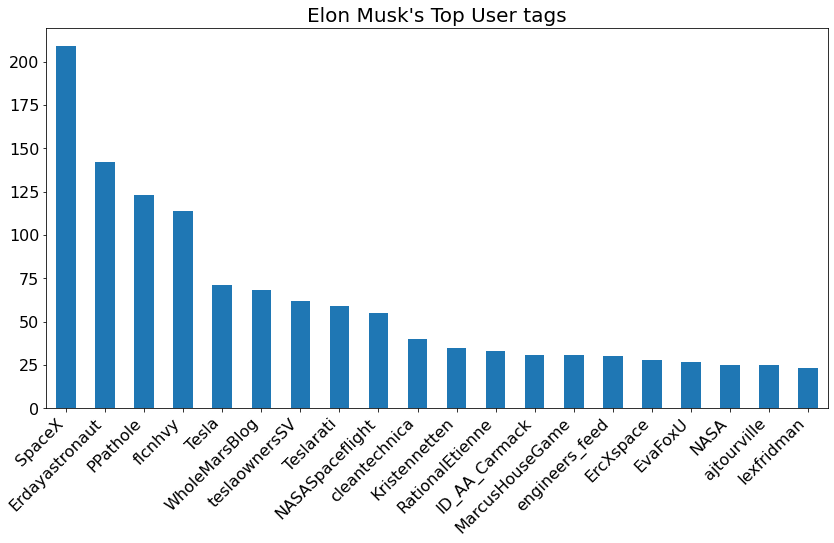

In [5]:
import itertools

c = list(
itertools.chain(
    *elon.Text.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ") 
                            if '@' in handle.replace(":", "")]).tolist()))

pd.Series(c).value_counts().head(20).plot.bar(figsize=(14, 7), fontsize=16)
plt.gca().set_title('Elon Musk\'s Top User tags', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, ha='right', fontsize=16)

In [6]:
from nltk import word_tokenize
tokens = elon.Text.map(word_tokenize)

def Elon_Musk_Opinion_on(x):
    x_l = x.lower()
    x_t = x.title()
    return elon.loc[tokens.map(lambda sent: x_l in sent or x_t in sent).values]

In [7]:
Elon_Musk_Opinion_on('Space').Text.values.tolist()

['RT @SpaceX: This mission enables access for everyday people who dream of going to space',
 '@NASASpaceflight Unlike its aircraft division, which is fine, the FAA space division has a fundamentally broken reg\x85 https://t.co/sI63AXBJbz',
 'RT @SpaceX: SpaceX\x92s rideshare offering provides increased access to space for small satellite operators seeking a reliable, affordable rid\x85',
 '@engineers_feed Not to get to orbit, unfortunately. In space, photon emission powered by matter-antimatter annihila\x85 https://t.co/Y8PO10oPQN',
 '@wonderofscience Near-orbital space is the fastest way to travel long distance on Earth!',
 '@SpaceX @Space_Station It\x92s called the Space \x93Station\x94, but it\x92s actually moving around Earth at ~25 times the spee\x85 https://t.co/vYVIvrtZsa',
 '@shifthappends @Tesla A lot of my brain space is spent dealing with both units!',
 'RT @NASA: <U+0001F409> Enter the Crew Dragon. At 4:48 p.m. EST (9:48 p.m. UTC), the NASA @SpaceX Crew-1 astronauts give yo

In [8]:
# Function for Cleaning the tweets
import re
def cleantext(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"@[A-Za-z]+", "", tweet) # Remove Mentions
    tweet = re.sub(r"#", "", tweet) # Remove Hashtags Symbol
    tweet = re.sub(r"RT[\s]+", "", tweet) # Remove Retweets
    tweet = re.sub(r"https?:\/\/\S+", "", tweet) # Remove The Hyper Link
    
    return tweet

In [9]:
# Cleaning The Tweets
elon["Text"] = elon["Text"].apply(cleantext)
elon
musk = elon.copy()
musk

,Text
0,11 im an alien
1,_aa_carmack ray tracing on cyberpunk with hdr ...
2,great interview!
3,27 doge is underestimated
4,congratulations tesla china for amazing execu...
...,...
1994,"true, it sounds so surreal, but the negative ..."
1995,make sure to read ur terms &amp; conditions b...
1996,samwise gamgee
1997,altho dumb and dumber is <u+0001f525><u+0001f...


In [10]:
musk = [Text.strip() for Text in musk.Text] # remove both the leading and the trailing characters
musk = [Text for Text in musk if Text] # removes empty strings, because they are considered in Python as False

In [11]:
# Joining the list into one string/text
text = ' '.join(musk)
text

'11 i\x92m an alien _aa_carmack ray tracing on cyberpunk with hdr is next-level. have you tried it? great interview! 27 doge is underestimated congratulations tesla china for amazing execution last year. now on to the next for even more!! happy new year of the ox! frodo was the underdoge,\nall thought he would fail,\nhimself most of all. _  10 haha thanks :) 10 indeed! tweets definitely do not represent real-world time allocation. the most entertaining outcome is the most likely just sent some just agree to do clubhouse with it\x92s getting real bought some dogecoin for lil x, so he can be a toddler hodler he definitely has issues, but the sentencing seems a bit high thanks for fixing please unlock my account <u+0001f923><u+0001f923> this is true power haha any crypto wallet that won\x92t give you your private keys should be avoided at all costs your app sucks rt : nasa has selected falcon heavy to launch the first two elements of the lunar gateway together on one mission! yes 3  _ onc

In [12]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))
no_punc_text

'11 i\x92m an alien aacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it great interview 27 doge is underestimated congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox frodo was the underdoge\nall thought he would fail\nhimself most of all   10 haha thanks  10 indeed tweets definitely do not represent realworld time allocation the most entertaining outcome is the most likely just sent some just agree to do clubhouse with it\x92s getting real bought some dogecoin for lil x so he can be a toddler hodler he definitely has issues but the sentencing seems a bit high thanks for fixing please unlock my account u0001f923u0001f923 this is true power haha any crypto wallet that won\x92t give you your private keys should be avoided at all costs your app sucks rt  nasa has selected falcon heavy to launch the first two elements of the lunar gateway together on one mission yes 3   once we can predict cash flow rea

In [13]:
import nltk
#nltk.download('wordnet')
#nltk.download('stopwords')
#Tokenizing sentences
sentences = nltk.sent_tokenize(no_punc_text)

#Tokenizing words
words = nltk.word_tokenize(no_punc_text)

In [14]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

#Stemming
ps = PorterStemmer()

corpus = []
for i in range(len(sentences)):
    review = re.sub('[^a-zA-Z]',' ',sentences[i])
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

corpus

['alien aacarmack ray trace cyberpunk hdr nextlevel tri great interview doge underestim congratul tesla china amaz execut last year next even happi new year ox frodo underdog thought would fail haha thank inde tweet definit repres realworld time alloc entertain outcom like sent agre clubhous get real bought dogecoin lil x toddler hodler definit issu sentenc seem bit high thank fix pleas unlock account u f u f true power haha crypto wallet give privat key avoid cost app suck rt nasa select falcon heavi launch first two element lunar gateway togeth one mission ye predict cash flow reason well starlink ipo starlink staggeringli difficult technic amp econom endeavor howev spacex need pass deep chasm neg cash flow next year aacarmack lowest cost per ton carbon sequest net valu product made must scalabl g meant price countri differ tax amp ship intend earth may idea appli mar zpalmer u f u f xprize team manag carbon captur prize everyon tesla receiv stock comp stockopt take tabl miss back wo

In [15]:
from nltk.stem import WordNetLemmatizer
wordnet = WordNetLemmatizer()

#Lemmatization

lemma = []
for i in range(len(sentences)):
    review1 = re.sub('[^a-zA-Z]',' ',sentences[i])
    review1 = review1.split()
    review1 = [wordnet.lemmatize(word,pos="v") for word in sentences if not word in set(stopwords.words('english'))]
    review1 = ' '.join(review1)
    lemma.append(review1)

lemma

['11 i\x92m an alien aacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it great interview 27 doge is underestimated congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox frodo was the underdoge\nall thought he would fail\nhimself most of all   10 haha thanks  10 indeed tweets definitely do not represent realworld time allocation the most entertaining outcome is the most likely just sent some just agree to do clubhouse with it\x92s getting real bought some dogecoin for lil x so he can be a toddler hodler he definitely has issues but the sentencing seems a bit high thanks for fixing please unlock my account u0001f923u0001f923 this is true power haha any crypto wallet that won\x92t give you your private keys should be avoided at all costs your app sucks rt  nasa has selected falcon heavy to launch the first two elements of the lunar gateway together on one mission yes 3   once we can predict cash flow re

In [16]:
#Feature Extraction

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemma)
print(vectorizer.vocabulary_)

{'11': 19, 'an': 338, 'alien': 302, 'aacarmack': 198, 'ray': 2926, 'tracing': 3738, 'on': 2543, 'cyberpunk': 1001, 'with': 4135, 'hdr': 1723, 'is': 1981, 'nextlevel': 2463, 'have': 1717, 'you': 4183, 'tried': 3759, 'it': 1988, 'great': 1654, 'interview': 1961, '27': 90, 'doge': 1148, 'underestimated': 3907, 'congratulations': 891, 'tesla': 3618, 'china': 784, 'for': 1498, 'amazing': 329, 'execution': 1342, 'last': 2066, 'year': 4174, 'now': 2494, 'to': 3697, 'the': 3640, 'next': 2462, 'even': 1315, 'more': 2384, 'happy': 1701, 'new': 2460, 'of': 2533, 'ox': 2609, 'frodo': 1532, 'was': 4049, 'underdoge': 3906, 'all': 305, 'thought': 3669, 'he': 1724, 'would': 4157, 'fail': 1381, 'himself': 1777, 'most': 2389, '10': 8, 'haha': 1684, 'thanks': 3636, 'indeed': 1895, 'tweets': 3800, 'definitely': 1045, 'do': 1140, 'not': 2486, 'represent': 3003, 'realworld': 2945, 'time': 3687, 'allocation': 307, 'entertaining': 1284, 'outcome': 2586, 'likely': 2133, 'just': 2015, 'sent': 3189, 'some': 3345

In [17]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

['1matthewgarcia', '1st', '1stprinciples4l', '20', '2007', '2008', '2009', '200mph', '2012', '2017', '2020', '2021', '2024', '2026', '2030', '20k', '20km', '20m', '210', '21014829', '212', '218', '21st', '22', '225', '22x', '23', '230', '23life', '24', '240am', '247', '247teslanews', '25', '250', '250kw', '25d', '25gunscom', '25k', '25th', '27', '28', '2823', '28715306', '28delayslater', '28th', '29', '2908', '2ejaxa', '2funny1']
[]


In [18]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(lemma)

In [19]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['aacarmack', 'about', 'all', 'also', 'amp', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'can', 'do', 'dragon', 'enough', 'falcon', 'feed', 'first', 'for', 'from', 'good', 'great', 'haha', 'has', 'have', 'he', 'high', 'if', 'in', 'in the', 'is', 'it', 'just', 'launch', 'like', 'make', 'maybe', 'model', 'more', 'most', 'much', 'my', 'need', 'new', 'next', 'no', 'not', 'now', 'of', 'of the', 'on', 'one', 'only', 'or', 'our', 'out', 'people', 'probably', 'production', 're', 'rt', 'should', 'so', 'some', 'soon', 'spacex', 'starship', 'station', 'still', 'sure', 'tesla', 'than', 'that', 'the', 'there', 'they', 'this', 'this is', 'to', 'to be', 'to the', 'too', 'true', 'u0001f923u0001f923', 'very', 'was', 'we', 'we re', 'what', 'will', 'will be', 'with', 'would', 'yeah', 'year', 'yes', 'you', 'your']
[[ 31  39  57  33 218  41  85 100  73  93 157 126  37  56  39  39  29  29
   31  39 194  72  51  76  55  58  74  31  29  40 219  37 355 194  64  49
   38  33  30  27  55  33  40  42  31  

In [20]:
#TFidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 2000)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(lemma)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['00', '03', '09', '10', '100', '10x', '11', '11742', '13', '13031925', '15', '17', '1b', '20', '2020', '21st', '22', '22x', '22x yes', '23', '24', '247', '247 the', '25', '25 times', '28', '28delayslater', '2908', '2ejaxa', '2jr', '30', '300', '300 bar', '301', '304', '305', '305 aacarmack', '305 yes', '31345919', '330', '330 bar', '37', '39a', '3d', '3owners', '3owners energy', '3owners energy plasma', '40', '45', '45 sure', '4d', '4nygov', '4s1', '4ttwegner', '50', '60', '60 starlink', '60 starlink satellites', '65', '74', '78', '85', '85 nsf', '85 stanley', '85 stanley bass3d', '90', 'aacarmack', 'able', 'able to', 'abort', 'about', 'about the', 'above', 'absolutely', 'access', 'accurate', 'actual', 'actually', 'add', 'adding', 'advanced', 'after', 'again', 'ago', 'agree', 'agreed', 'ahead', 'ahem', 'ai', 'ai com', 'ai symbiosis', 'aiming', 'air', 'all', 'all tesla', 'all that', 'all the', 'allocation', 'almost', 'already', 'also', 'although', 'although it', 'always', 'am', 'amazin

In [21]:
#Generate Word Cloud
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

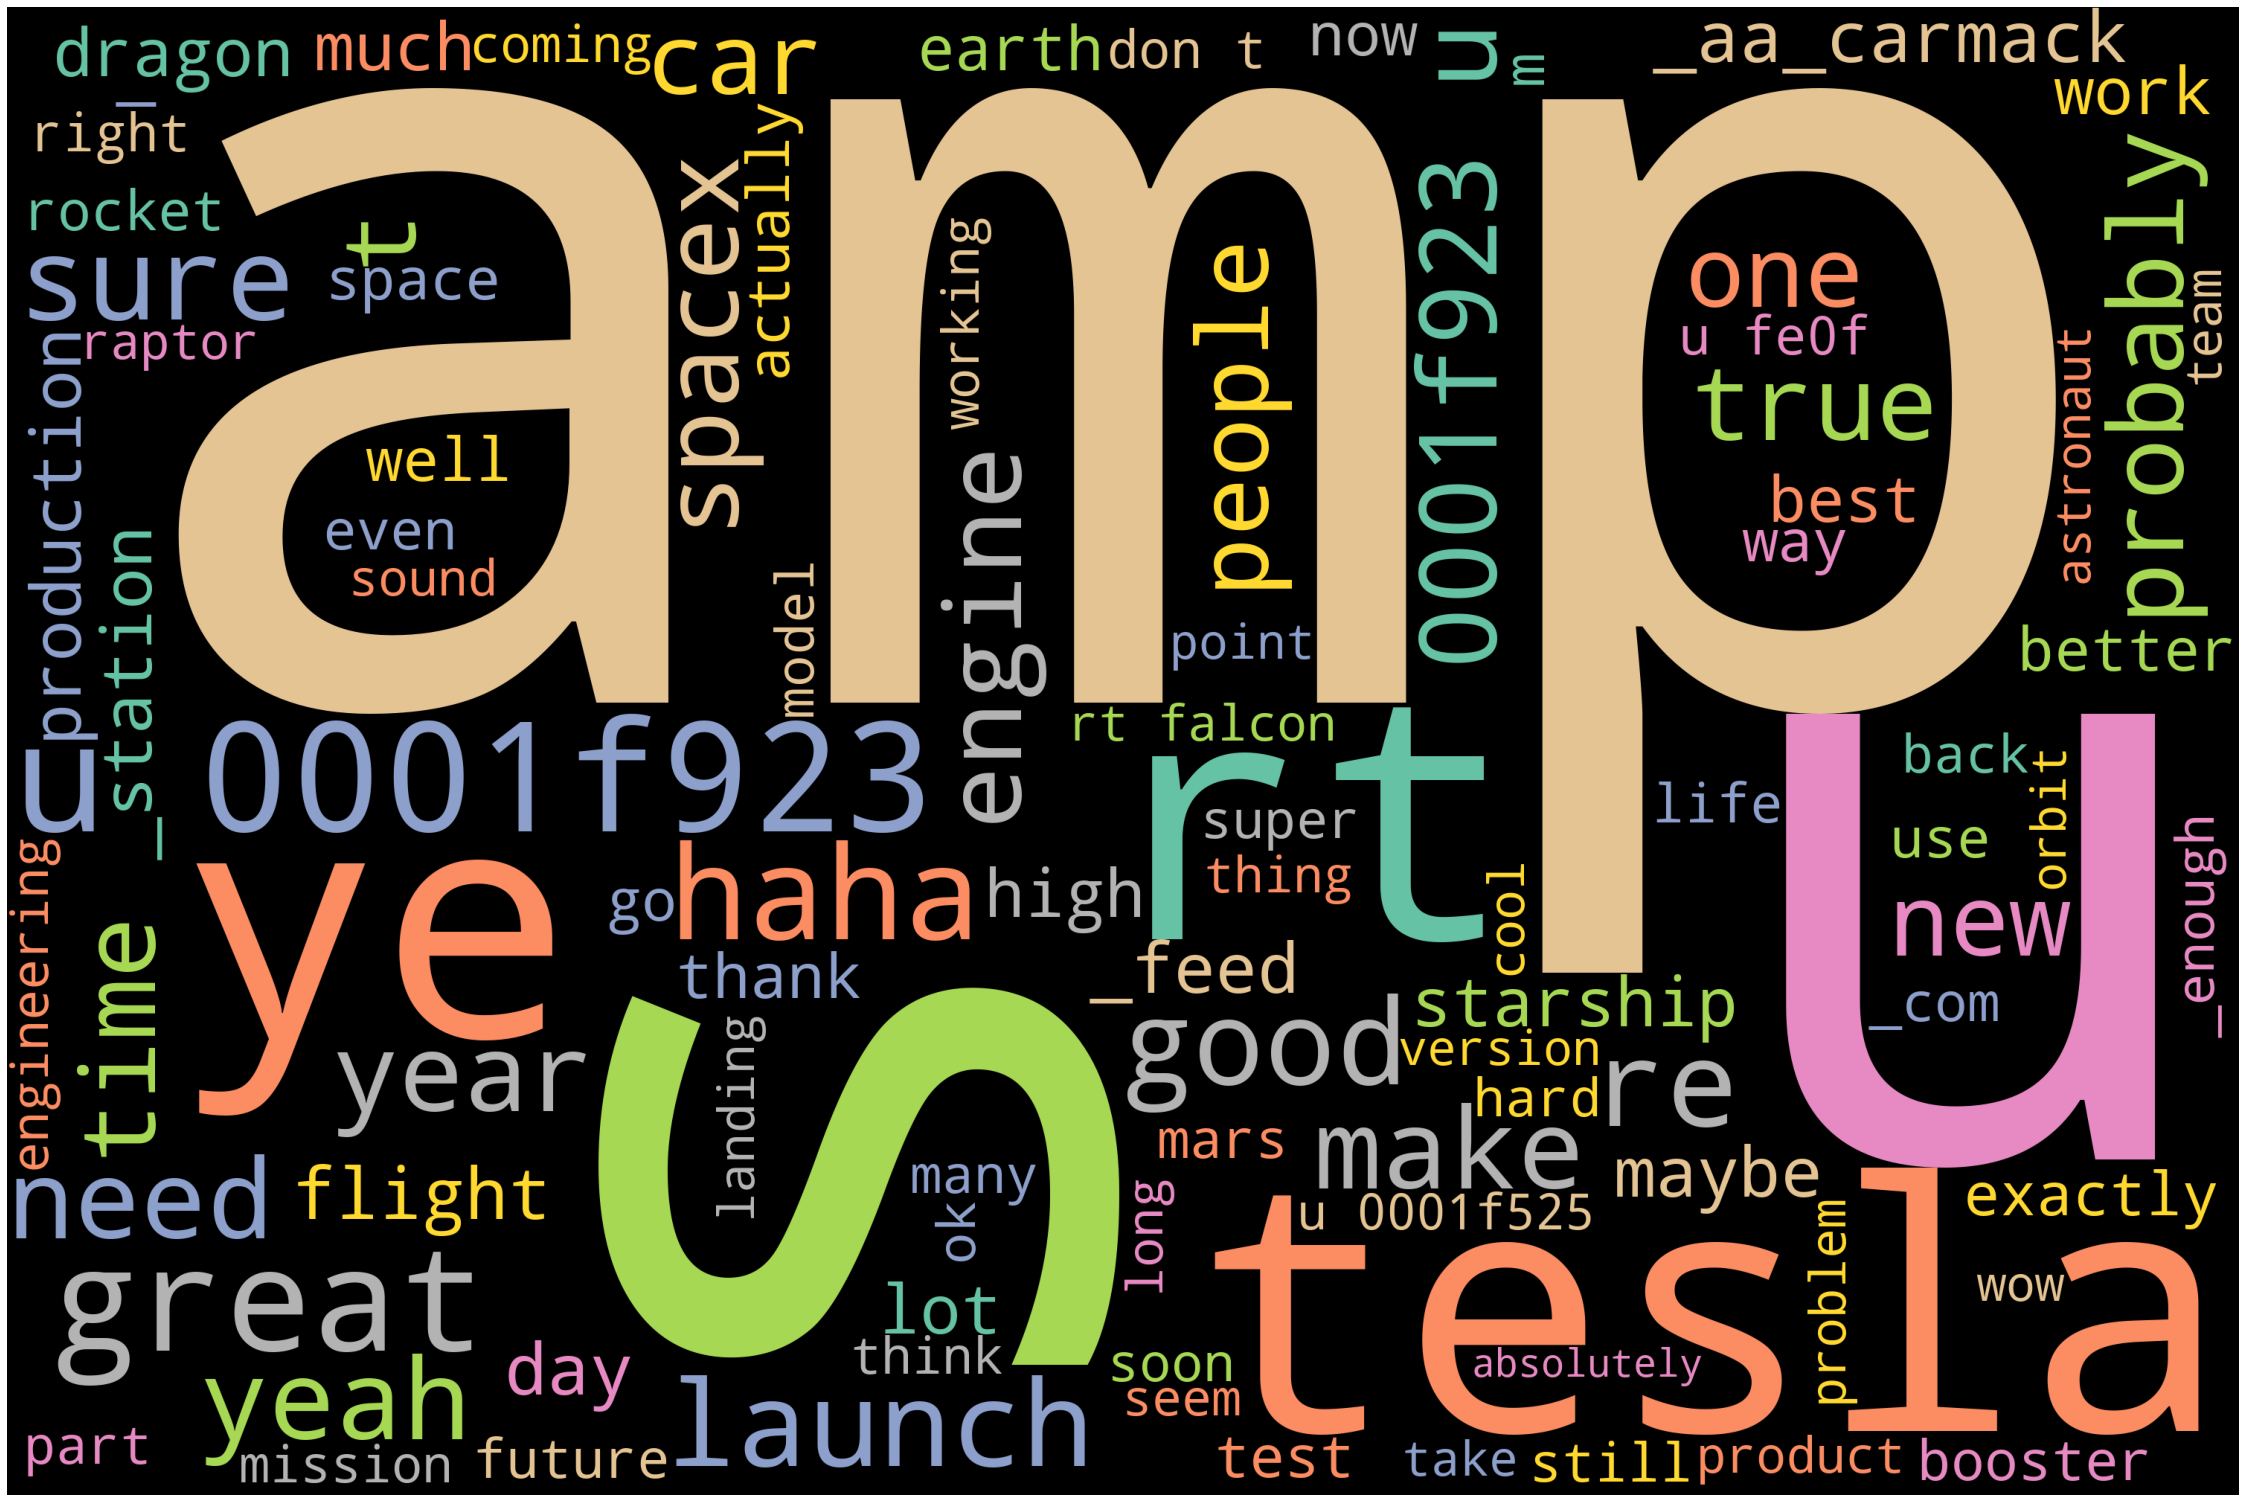

In [22]:
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)